In [1]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
# Read the data 
data = pd.read_csv('C:/Users/admin/Desktop/EnvModSoft/VLagun_SHAP_2_cyano.csv')

# Drop null values 
data.dropna(inplace=True)
# Prepare X and Y 
X = pd.get_dummies(data)
X.drop(['Cyanobacteria'], inplace=True, axis=1)

X.head()

,Salinity,O2,SRP,DOP,PP,NH4N,NO3N,DON,PN,Fe,SiO4Si,DOC,TPOC,Chlorophyta,Diatoms,picophytoplankton,Water temp.,Wind speed,Depth,SS
0,3.757624,9.46,3.5,11.7,185.0,0.039,0.022,0.551,0.759,0.0121,2.3112,7.500,8.5650,3.08,0.230,3.20,18.3,3.5,3.3,52.0
1,3.504707,9.89,4.4,17.5,111.3,0.020,0.025,0.123,1.181,0.0136,2.1157,7.860,8.5200,2.87,0.010,2.42,19.1,0.0,3.6,50.0
2,3.721493,9.63,11.7,13.0,117.6,0.036,0.021,0.727,0.134,0.0390,2.1817,7.535,8.4706,7.47,0.060,2.61,17.5,4.0,3.2,62.0
3,4.407982,9.54,7.4,16.2,124.7,0.023,0.024,0.566,0.895,0.0179,2.0537,7.282,8.7020,5.03,0.110,2.49,18.4,3.5,3.0,55.0
4,4.389916,9.34,13.8,21.4,84.4,0.031,0.030,0.022,1.069,0.0201,2.0666,7.370,7.8796,5.69,0.005,1.73,17.8,4.0,3.7,53.0


In [3]:
X = X.iloc[:,0:20]
y = data['Cyanobacteria']
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (108, 20)
Shape of X_test: (47, 20)


In [4]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train);

In [5]:
model = XGBRegressor(n_estimators=1000, max_depth=5, learning_rate=0.001, random_state=None)
# Fit the Model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Assuming you have your data in X and y
# X should be your features, and y should be your target variable

# Placeholder for storing MSE and MAPE values
mse_train_list = []
mape_train_list = []
mse_test_list = []
mape_test_list = []
mse_y_list = []
mape_y_list = []

# Number of iterations
num_iterations = 5

for iteration in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=iteration)

    # Initialize the XGBoost regressor
    xgb_model = XGBRegressor()

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predictions on the training set
    y_train_pred = xgb_model.predict(X_train)

    # Predictions on the test set
    y_test_pred = xgb_model.predict(X_test)
    
    y_pred = xgb_model.predict(X)

    # Calculate MSE and MAPE for training set
    mse_train = mean_squared_error(y_train, y_train_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

    # Calculate MSE and MAPE for test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    mse_y = mean_squared_error(y, y_pred)
    mape_y = np.mean(np.abs((y - y_pred) / y)) * 100

    # Append values to the lists
    mse_train_list.append(mse_train)
    mape_train_list.append(mape_train)
    mse_test_list.append(mse_test)
    mape_test_list.append(mape_test)
    mse_y_list.append(mse_y)
    mape_y_list.append(mape_y)

# Calculate average MSE and MAPE over the iterations
avg_mse_train = np.mean(mse_train_list)
avg_mape_train = np.mean(mape_train_list)
avg_mse_test = np.mean(mse_test_list)
avg_mape_test = np.mean(mape_test_list)
avg_mse_y = np.mean(mse_y_list)
avg_mape_y = np.mean(mape_y_list)

print(f"Average MSE (Train): {avg_mse_train}")
print(f"Average MAPE (Train): {avg_mape_train}")
print(f"Average MSE (Test): {avg_mse_test}")
print(f"Average MAPE (Test): {avg_mape_test}")
print(f"Average MSE (y): {avg_mse_y}")
print(f"Average MAPE (y): {avg_mape_y}")

Average MSE (Train): 3.3229318883678167e-07
Average MAPE (Train): 0.02700542714305305
Average MSE (Test): 7.038915015673501
Average MAPE (Test): 72.46866779699008
Average MSE (y): 2.1343809137052836
Average MAPE (y): 21.993186919935376


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_percentage_error

In [8]:
def mape_scorer(y, y_pred):
    return mean_absolute_percentage_error(y, y_pred)* 100

In [9]:
kf = KFold(n_splits=6, shuffle=True, random_state=iteration)
avg_mse_train_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
avg_mape_train_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring=make_scorer(mape_scorer, greater_is_better=False))
avg_mse_test_scores = cross_val_score(xgb_model, X_test, y_test, cv=kf, scoring='neg_mean_squared_error')
avg_mape_test_scores = cross_val_score(xgb_model, X_test, y_test, cv=kf, scoring=make_scorer(mape_scorer, greater_is_better=False))

In [10]:
print(f"Average Cross-Validated MSE (Train): {-avg_mse_train_scores.mean()}")
print(f"Average Cross-Validated MAPE (Train): {-avg_mape_train_scores.mean()}")
print(f"Average Cross-Validated MSE (Test): {-avg_mse_test_scores.mean()}")
print(f"Average Cross-Validated MAPE (Test): {-avg_mape_test_scores.mean()}")

Average Cross-Validated MSE (Train): 6.068553619235743
Average Cross-Validated MAPE (Train): 75.3416490783775
Average Cross-Validated MSE (Test): 7.3877157936515045
Average Cross-Validated MAPE (Test): 86.58777088942027


In [11]:
num_iterations = 5

# List to store feature importances
feature_importance_sum = np.zeros(X.shape[1])
feature_importance_squared_sum = np.zeros(X.shape[1])

In [12]:
for iteration in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=iteration)

    # Define and train the XGBoost model
    model = XGBRegressor()
    model.fit(X_train, y_train)

In [13]:
from xgboost import XGBRegressor, plot_importance,to_graphviz

<Figure size 432x288 with 0 Axes>

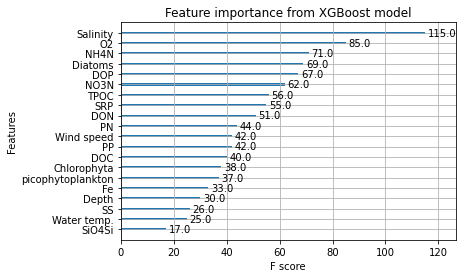

In [14]:
plt.figure()
plot_importance(model,title="Feature importance from XGBoost model")
plt.show()

In [15]:
# load JS visualization code to notebook
shap.initjs()

In [16]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(regressor)
# Calculate Shap values
shap_values = explainer.shap_values(X)

In [17]:
num_iterations = 5

# List to store Shapley values
shap_values_sum = np.zeros(X.shape)

In [18]:
for iteration in range(num_iterations):
    
    # Define and train the XGBoost model
    model = XGBRegressor()
    model.fit(X,y)

    # Create a Tree explainer
    explainer = shap.TreeExplainer(model)

    # Calculate Shapley values
    shap_values = explainer.shap_values(X)
    
    # Ensure the indices are within bounds
    valid_indices = np.arange(X.shape[0])
    shap_values_sum[valid_indices] = shap_values

In [19]:
shap_values = shap_values_sum / num_iterations

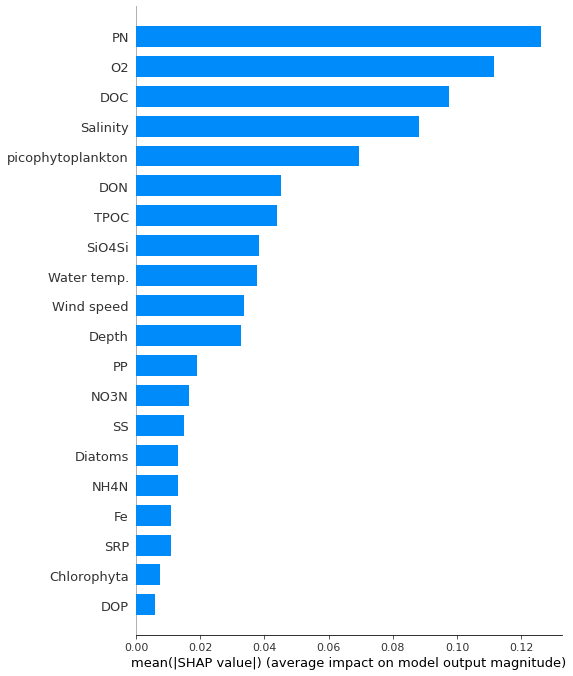

In [20]:
shap.summary_plot(shap_values, X, plot_type="bar", max_display=20)

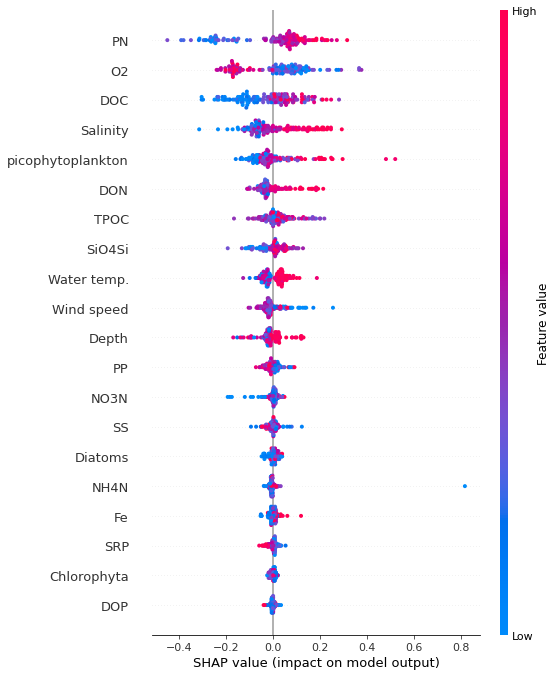

In [21]:
shap.summary_plot(shap_values, X,max_display=20)

In [22]:
# load JS visualization code to notebook
shap.initjs()

In [23]:
shap.force_plot(explainer.expected_value,  shap_values[:155,:], show=False, features=X.iloc[:155,:]) 

In [24]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/admin/Desktop/EnvModSoft/VLagun_SHAP_2_cyano.csv') # Load the data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
# The target variable is 'quality'.
X = pd.get_dummies(data)
X.drop(['Cyanobacteria'], inplace=True, axis=1)
y = data['Cyanobacteria']
X

,Salinity,O2,SRP,DOP,PP,NH4N,NO3N,DON,PN,Fe,SiO4Si,DOC,TPOC,Chlorophyta,Diatoms,picophytoplankton,Water temp.,Wind speed,Depth,SS
0,3.757624,9.46,3.5,11.7,185.0,0.039,0.022,0.551,0.759,0.0121,2.3112,7.5000,8.5650,3.08,0.230,3.20,18.3,3.5,3.3,52.00
1,3.504707,9.89,4.4,17.5,111.3,0.020,0.025,0.123,1.181,0.0136,2.1157,7.8600,8.5200,2.87,0.010,2.42,19.1,0.0,3.6,50.00
2,3.721493,9.63,11.7,13.0,117.6,0.036,0.021,0.727,0.134,0.0390,2.1817,7.5350,8.4706,7.47,0.060,2.61,17.5,4.0,3.2,62.00
3,4.407982,9.54,7.4,16.2,124.7,0.023,0.024,0.566,0.895,0.0179,2.0537,7.2820,8.7020,5.03,0.110,2.49,18.4,3.5,3.0,55.00
4,4.389916,9.34,13.8,21.4,84.4,0.031,0.030,0.022,1.069,0.0201,2.0666,7.3700,7.8796,5.69,0.005,1.73,17.8,4.0,3.7,53.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,4.300000,9.79,18.1,5.2,150.0,0.048,0.018,0.519,1.037,0.0360,2.8380,7.4100,12.2980,1.76,0.490,3.51,16.4,6.7,3.2,113.75
151,3.900000,9.80,26.1,4.6,143.4,0.037,0.029,0.706,0.933,0.0910,2.9350,8.0990,10.3220,0.62,1.650,3.36,16.4,7.6,2.6,112.50
152,3.300000,9.82,21.7,36.8,125.0,0.035,0.026,0.877,0.971,0.0650,3.1920,8.6190,12.0510,2.49,1.670,3.41,16.1,8.2,2.4,93.75
153,3.100000,10.58,50.2,19.2,136.1,0.032,0.029,0.835,0.982,0.0120,3.2560,8.2215,10.8750,3.54,5.180,6.01,16.1,11.0,1.8,103.75


In [26]:
# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

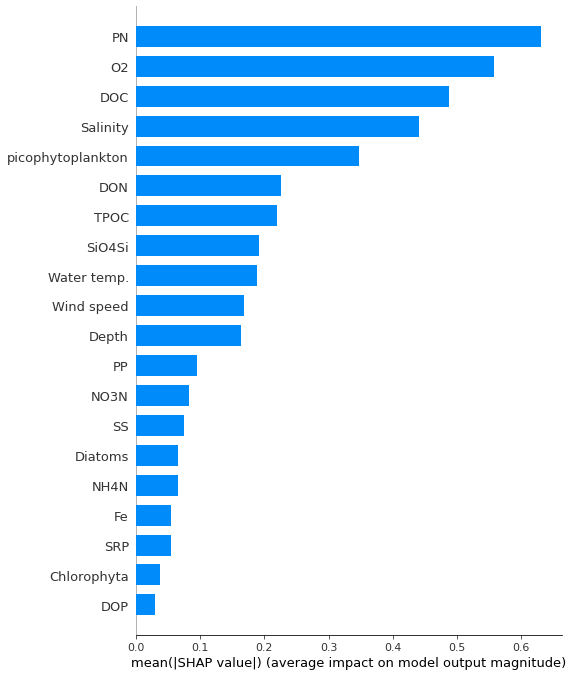

In [27]:
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar", max_display=20)

In [28]:
def ABS_SHAP(df_shap, df):
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index', axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = []
    for i in feature_list:
        b = np.corrcoef(shap_v[i], df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.DataFrame({'Variable': feature_list, 'Corr': corr_list})
    corr_df['Sign'] = np.where(corr_df['Corr'] > 0, 'red', 'blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(8,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

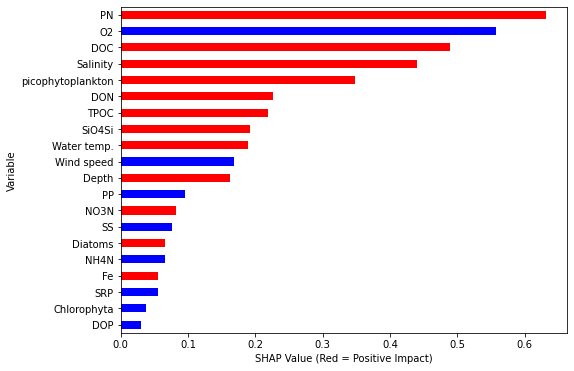

In [29]:
ABS_SHAP(shap_values, X) 
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [30]:
shap_df = pd.DataFrame(shap_values.values, columns=shap_values.feature_names)
shap_mean = shap_df.abs().mean().sort_values(ascending=False).head(20)

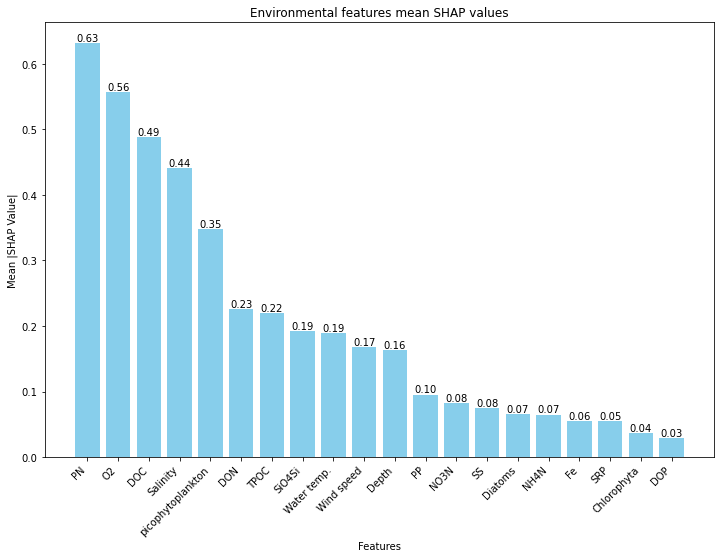

In [31]:
plt.figure(figsize=(12, 8))
bars = plt.bar(shap_mean.index, shap_mean.values, color='skyblue')
plt.title('Environmental features mean SHAP values')
plt.xlabel('Features')
plt.ylabel('Mean |SHAP Value|')
plt.xticks(rotation=45, ha='right', fontsize=10)

for bar, value in zip(bars, shap_mean.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{value:.2f}',  # Format to 2 decimal places
        ha='center',
        va='bottom'
    )

In [32]:
import pandas as pd
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

print(shap_values, ',')

.values =
array([[ 1.48329496e-01,  1.20920755e-01, -4.71521914e-02,
        -2.07108501e-02, -1.22323729e-01, -1.04672752e-01,
         2.22823508e-02, -1.99614510e-01,  7.18589798e-02,
        -6.58522025e-02, -1.95724964e-01, -5.14462113e-01,
        -8.68301466e-02,  8.56759958e-03,  1.77506879e-02,
        -3.27271253e-01,  7.22935349e-02, -7.06953034e-02,
        -1.32707939e-01, -4.65633035e-01],
       [-3.14460486e-01,  1.84596777e-01,  2.15098150e-02,
         9.18650534e-03, -1.38312221e-01, -2.77387910e-02,
         7.40109012e-02, -2.26745144e-01,  8.34345102e-01,
        -8.34296346e-02, -5.08281112e-01,  1.73208982e-01,
         7.61558473e-01,  1.61785483e-02, -1.92543268e-02,
         2.12321430e-01,  2.88658738e-01,  5.39297879e-01,
         2.83243865e-01,  6.75515458e-02],
       [ 1.26938231e-03,  3.94836277e-01,  5.01829647e-02,
        -1.72805618e-02, -4.39241976e-02,  9.47188307e-03,
        -8.73849913e-03, -3.36933248e-02, -1.44014442e+00,
         1.42823812

In [33]:
import pandas as pd
import numpy as np

# Example shap_values (replace with your actual shap_values)
# shap_values should be a 2D array
shap_values = np.random.rand(155, 20)  # Replace with actual shap_values

shap_values = [[ 1.48329496e-01,  1.20920755e-01, -4.71521914e-02,
        -2.07108501e-02, -1.22323729e-01, -1.04672752e-01,
         2.22823508e-02, -1.99614510e-01,  7.18589798e-02,
        -6.58522025e-02, -1.95724964e-01, -5.14462113e-01,
        -8.68301466e-02,  8.56759958e-03,  1.77506879e-02,
        -3.27271253e-01,  7.22935349e-02, -7.06953034e-02,
        -1.32707939e-01, -4.65633035e-01],
       [-3.14460486e-01,  1.84596777e-01,  2.15098150e-02,
         9.18650534e-03, -1.38312221e-01, -2.77387910e-02,
         7.40109012e-02, -2.26745144e-01,  8.34345102e-01,
        -8.34296346e-02, -5.08281112e-01,  1.73208982e-01,
         7.61558473e-01,  1.61785483e-02, -1.92543268e-02,
         2.12321430e-01,  2.88658738e-01,  5.39297879e-01,
         2.83243865e-01,  6.75515458e-02],
       [ 1.26938231e-03,  3.94836277e-01,  5.01829647e-02,
        -1.72805618e-02, -4.39241976e-02,  9.47188307e-03,
        -8.73849913e-03, -3.36933248e-02, -1.44014442e+00,
         1.42823812e-02, -1.30837485e-01, -3.35266650e-01,
        -1.02398038e-01,  3.11883073e-02, -3.64601165e-02,
        -1.71434999e-01, -1.76037505e-01, -6.99373037e-02,
        -1.35440767e-01,  8.26947484e-03],
       [ 1.03778541e+00,  2.28898749e-01,  1.44599853e-02,
         1.21902965e-03, -6.75036153e-03, -6.99146390e-02,
         1.11622371e-01, -1.08165257e-01,  5.21600008e-01,
         1.08469248e-01, -1.46401167e-01, -3.29195142e-01,
         2.90139824e-01,  3.39003094e-02,  6.82343394e-02,
         2.99540102e-01,  1.85675189e-01, -8.03515911e-02,
        -1.72844052e-01,  6.96729422e-02],
       [ 9.86277819e-01,  2.07790315e-01,  3.71800363e-02,
         4.90414398e-03,  1.06396198e-01,  6.24578819e-02,
        -7.31770992e-02, -1.37672767e-01,  3.56063694e-01,
        -3.64218019e-02, -1.67712763e-01, -1.07012236e+00,
        -1.30631507e-03, -8.18411820e-03, -1.92832276e-01,
        -1.95824280e-01, -6.85065389e-02, -8.60650763e-02,
         6.02944344e-02, -2.56034493e-01],
       [ 3.60093862e-01,  2.40580678e-01, -1.35186752e-02,
        -1.46455159e-02, -9.95426700e-02, -7.74941519e-02,
         1.54041136e-02, -1.09471433e-01,  5.08420914e-03,
        -1.90581419e-02, -1.43928766e-01, -1.06467795e+00,
        -1.07521459e-01,  2.01533530e-02, -1.77270278e-01,
        -6.67966366e-01, -1.64004579e-01, -7.83503726e-02,
         8.05969983e-02, -3.56539041e-01],
       [-5.27691841e-01,  3.19064915e-01,  1.95306987e-02,
        -2.96788104e-02,  5.52177243e-02, -5.13727553e-02,
         3.38357873e-02, -6.16221391e-02,  7.72437900e-02,
        -6.21144567e-03, -1.78225368e-01, -7.42494822e-01,
        -4.94407341e-02,  2.69018225e-02, -1.05932556e-01,
        -1.44511521e-01, -3.50186199e-01,  4.55629826e-02,
        -5.73284887e-02, -2.54565060e-01],
       [-2.88299948e-01,  4.57005680e-01,  4.02156897e-02,
        -2.66717300e-02,  1.52690321e-01, -2.71104295e-02,
         3.77552360e-02, -2.07538739e-01,  3.44982654e-01,
         3.57886171e-03, -3.01435351e-01,  2.46958379e-02,
         1.09183699e-01,  4.56848107e-02,  5.39582931e-02,
        -9.61693153e-02, -1.55139536e-01,  1.61560979e-02,
        -4.40693080e-01,  1.47016570e-02],
       [ 3.14653665e-01, -7.68586695e-02, -2.79811434e-02,
        -2.70030480e-02, -2.35171109e-01, -3.98429409e-02,
         1.09919878e-02, -1.59875482e-01,  4.12623376e-01,
         6.74638376e-02, -2.84032524e-01,  9.48353857e-03,
        -2.68999755e-01, -1.50642535e-02, -7.79898167e-02,
        -2.86127895e-01, -3.23463589e-01, -5.65866195e-02,
        -1.13514014e-01, -1.33458108e-01],
       [ 5.51055849e-01,  6.98374569e-01,  6.36012852e-02,
         2.20802631e-02, -4.45791334e-02, -2.38708500e-03,
         1.04568474e-01,  6.92467541e-02,  3.37708414e-01,
         1.46200089e-02,  5.43213785e-01,  6.73738241e-01,
         6.88217998e-01,  6.28887117e-02, -8.11660364e-02,
        -1.06204405e-01,  1.65976226e-01, -1.09961390e-01,
         4.03204918e-01, -4.62129824e-02],
       [ 7.79251397e-01,  1.88028252e+00,  4.44068499e-02,
         2.02771486e-03, -6.89352527e-02,  4.07715130e+00,
         5.84704727e-02, -1.32614374e-01,  7.84331024e-01,
        -7.63389021e-02,  3.42188925e-01,  1.23695827e+00,
         1.09245276e+00,  1.13954311e-02,  1.25413328e-01,
         4.69555140e-01,  1.07893176e-01,  2.76566625e-01,
         5.91250181e-01,  3.55037659e-01],
       [ 1.33637458e-01,  3.56731504e-01,  4.38225828e-02,
        -2.64465716e-02, -1.05122030e-01, -2.20468771e-02,
        -6.22427203e-02,  6.53708680e-03,  9.34867859e-02,
        -2.44883318e-02, -2.18367681e-01,  5.23943491e-02,
        -5.30959129e-01, -3.97547968e-02, -1.83385700e-01,
        -2.32415080e-01,  1.63119599e-01, -5.43036163e-02,
        -1.51223913e-01, -1.29506752e-01],
       [-2.33174413e-01, -9.03563923e-04,  1.24803949e-02,
         6.19628979e-03, -1.32267535e-01, -6.06383607e-02,
        -2.22699732e-01, -2.33012006e-01,  1.89447805e-01,
        -7.59284012e-03, -1.48520479e-02,  3.19863826e-01,
        -1.06980823e-01, -7.39411190e-02, -6.41013086e-02,
        -8.89525488e-02,  1.84012070e-01, -1.03358626e-01,
        -8.41901720e-01, -3.93883139e-02],
       [ 6.52751625e-01,  4.80442584e-01,  8.55562761e-02,
        -1.01394402e-02, -2.87238304e-02, -1.59233324e-02,
         5.74102178e-02, -2.13356167e-01,  3.89660478e-01,
        -5.82486689e-02,  1.68992162e-01,  6.16919637e-01,
         9.15174007e-01, -2.57334039e-02, -2.06243005e-02,
         7.74815232e-02,  8.49054605e-02, -6.21673428e-02,
         6.50150955e-01,  2.35136859e-02],
       [-2.86200512e-02,  1.84675574e-01, -1.50054216e-01,
         8.00137408e-03,  2.72027333e-03, -6.21694885e-02,
         3.98514271e-02,  1.07694998e-01,  6.77910745e-01,
        -3.84462625e-02,  2.35574946e-01,  6.56586528e-01,
         8.46633136e-01, -6.56597391e-02,  4.91975658e-02,
         1.48010239e-01,  2.21515715e-01, -9.87016037e-02,
         6.08155429e-01,  5.68485959e-03],
       [ 6.46183193e-01,  4.67647791e-01, -2.75990125e-02,
         3.80219743e-02, -5.28488159e-02, -1.71430036e-02,
         6.71585798e-02,  5.67768991e-01,  2.98722893e-01,
         2.55754907e-02,  2.54749894e-01,  4.34436470e-01,
         2.88678318e-01, -1.22327299e-03,  1.17814697e-01,
        -7.34776556e-02,  1.34460852e-01, -9.61120129e-02,
        -1.10850833e-01,  2.61764731e-02],
       [ 1.22827070e-03,  7.71574795e-01,  4.17180583e-02,
        -1.73399478e-01,  6.86442405e-02, -2.69524362e-02,
        -1.45546691e-02, -1.39458746e-01, -7.70860970e-01,
        -1.51565985e-03,  1.10127419e-01, -7.64204562e-02,
         4.32475090e-01, -5.46380021e-02,  4.05728929e-02,
         1.07230163e+00,  1.59455121e-01, -3.10746729e-01,
        -7.47385845e-02, -9.68719944e-02],
       [-1.68661624e-01,  7.09404171e-01,  4.83083837e-02,
         3.97124365e-02, -3.89166437e-02, -2.28761956e-02,
         8.04176629e-02,  5.15098684e-02,  1.52597517e-01,
         7.22144619e-02,  5.19145131e-01,  4.14887071e-02,
         2.78127968e-01, -4.10591252e-02, -1.42232463e-01,
         9.95121062e-01,  2.04568461e-01, -2.07405418e-01,
        -1.36974439e-01,  6.24601357e-02],
       [ 1.09357870e+00,  6.53062105e-01, -2.00229231e-02,
        -1.66284181e-02, -1.18941449e-01, -7.96414446e-03,
        -3.08362484e-01,  8.47920835e-01, -7.33160615e-01,
        -3.89965661e-02,  2.31789742e-02,  4.52143341e-01,
         3.03477228e-01,  1.34775192e-02, -8.59099254e-03,
         3.15083899e-02,  1.76418692e-01, -4.55270596e-02,
         5.21941297e-02,  9.26230848e-03],
       [ 7.90423810e-01,  5.93915462e-01, -1.32400719e-02,
         1.71250897e-03,  3.64521407e-02, -2.81137154e-02,
         6.67438582e-02,  8.07068825e-01,  1.83191031e-01,
         4.82954842e-04,  2.34924659e-01,  7.62047172e-01,
        -3.38605419e-02, -9.20858886e-03,  9.23975110e-02,
         2.37679183e-02,  2.22333252e-01,  1.04806364e-01,
         1.11225314e-01,  2.08839457e-02],
       [ 7.45629847e-01,  1.62212834e-01, -7.85216093e-02,
        -1.74524542e-03,  4.38897669e-01, -8.81549995e-03,
        -6.91479668e-02, -2.95605659e-01,  4.16367680e-01,
         4.67629991e-02,  8.24739188e-02,  4.68185842e-01,
        -7.66883641e-02,  1.11591667e-02, -2.91347671e-02,
         8.31730664e-02,  1.75416127e-01, -1.77205756e-01,
         6.62897676e-02,  2.71028560e-02],
       [ 6.18444622e-01, -6.69457138e-01,  8.99458900e-02,
         1.03642000e-02,  3.47890407e-01, -1.11005222e-02,
        -4.94591659e-03, -1.95082963e-01,  1.24825871e+00,
         1.33973226e-01, -6.40608445e-02,  3.92448187e-01,
         4.83363084e-02, -9.67227505e-04,  4.16644141e-02,
         5.48992932e-01,  1.24301814e-01,  7.07421422e-01,
         1.22486569e-01,  3.90533768e-02],
       [ 5.47407150e-01,  5.65812051e-01, -2.36479603e-02,
        -2.13652607e-02, -1.78922832e-01, -3.10973842e-02,
        -6.33039102e-02, -1.92975119e-01,  1.15330696e-01,
         4.63532247e-02, -4.75138217e-01, -1.25685185e-01,
        -2.99401253e-01, -1.00100448e-03, -1.46021359e-02,
        -2.85870284e-01,  1.06655203e-01, -1.36134669e-01,
         2.33575664e-02,  5.25477529e-02],
       [ 9.42943931e-01,  2.74628013e-01,  7.80695975e-02,
        -1.42873991e-02,  9.40008014e-02,  1.77930705e-02,
         1.22106098e-01, -2.79563099e-01,  4.52705204e-01,
         6.63628131e-02, -2.75466532e-01,  1.29464969e-01,
        -1.75960273e-01, -4.55006063e-02,  4.66341451e-02,
        -1.76235244e-01,  7.95793608e-02,  1.30314693e-01,
        -2.29010005e-02,  8.25390592e-02],
       [-1.14884868e-01, -2.84197927e-01,  2.69673616e-01,
         1.16715021e-01,  1.10273667e-01, -5.33146877e-03,
         3.04557625e-02, -2.67019510e-01,  9.23510492e-01,
         6.08033463e-02, -2.72370338e-01,  3.00354332e-01,
         1.03273951e-01,  1.24921352e-02,  1.06345862e-01,
        -1.22332107e-02,  1.99567899e-01,  5.54983556e-01,
        -4.27345559e-02,  7.91533384e-03],
       [ 2.59389073e-01, -8.61534357e-01, -4.39426396e-03,
        -1.10244215e-01, -3.60745400e-01, -2.15537660e-03,
         3.26627754e-02, -1.43888608e-01,  6.41620755e-01,
         5.11447974e-02, -4.23664182e-01,  9.94770080e-02,
        -2.05509946e-01, -4.10044529e-02, -8.59342366e-02,
        -2.69208640e-01,  1.38636991e-01,  2.64655709e-01,
         8.10785145e-02, -1.42564669e-01],
       [-1.79684564e-01, -7.37903714e-01, -6.72597289e-02,
         6.49674423e-03, -1.57122761e-01, -2.02368107e-02,
         3.40275536e-03,  1.76449791e-02,  3.60718489e-01,
         2.13614944e-02, -4.45574164e-01,  2.81011522e-01,
         1.37040183e-01, -4.17154990e-02, -2.05054462e-01,
         5.22099972e-01,  1.79620907e-01, -1.46425322e-01,
        -1.17673382e-01,  5.90035878e-03],
       [-8.96451529e-03, -8.63584518e-01, -1.84440136e-01,
        -1.33216247e-01, -2.87150264e-01, -9.48812906e-03,
         2.60879435e-02, -1.09505039e-02,  3.04629654e-01,
        -5.74667181e-04, -4.31961328e-01,  6.03389069e-02,
         1.19230933e-02,  2.62414254e-02, -2.40420565e-01,
         5.83191775e-02,  1.68655351e-01,  2.15080261e-01,
        -1.52081653e-01, -4.07703035e-02],
       [-9.62509364e-02, -7.41644502e-01, -1.06423661e-01,
         3.83209288e-02, -1.85595647e-01, -4.50782618e-03,
         9.43040941e-03, -9.04029459e-02,  5.77650487e-01,
         7.88075998e-02, -4.46336657e-01,  2.54082650e-01,
        -4.02385369e-03,  4.03514430e-02, -5.23441434e-02,
         6.10614896e-01,  1.64453894e-01, -2.43447632e-01,
        -8.05094466e-02,  6.56388747e-03],
       [ 1.16092169e+00,  6.98648810e-01,  5.71436025e-02,
         9.33401473e-03,  1.21360701e-02, -1.84988882e-02,
         1.23201236e-02, -1.93775982e-01,  7.53696859e-01,
         1.61637254e-02,  2.66136318e-01,  8.65582585e-01,
         4.01531219e-01,  3.45522538e-02,  1.91002429e-01,
         3.39855552e-01, -9.81988609e-02, -5.93473651e-02,
        -6.20903015e-01, -7.04346970e-02],
       [ 1.14970267e+00,  1.83186460e+00,  1.55401200e-01,
         5.63776353e-03, -3.98629718e-02, -4.05141665e-03,
         1.35534734e-01,  8.93827438e-01,  6.28522277e-01,
         9.93283987e-02,  4.36512828e-01,  1.40455031e+00,
         9.96631444e-01,  3.42335403e-02,  1.75328225e-01,
         5.22518337e-01, -1.42091915e-01,  1.67472258e-01,
         6.02940738e-01, -5.75383082e-02],
       [ 1.07160270e+00,  1.75616425e-02,  4.43031453e-02,
        -2.54666954e-02, -1.06594026e-01, -3.22870240e-02,
        -2.76512485e-02, -1.65061340e-01,  4.42968667e-01,
         3.40915914e-03, -1.69244446e-02, -9.30771410e-01,
         4.73181941e-02,  3.36214602e-02,  6.61703711e-03,
        -1.93305627e-01, -1.11979052e-01, -3.82148027e-02,
        -2.21414313e-01,  3.02423071e-02],
       [ 9.26673770e-01,  8.70676756e-01,  5.24976440e-02,
         6.75635189e-02, -3.96670662e-02,  5.41442595e-02,
         5.02829663e-02, -2.48025030e-01,  3.52097183e-01,
         6.34080619e-02,  2.48903856e-01,  7.62323618e-01,
         5.10482630e-03,  4.36626635e-02,  1.12714276e-01,
         4.71325666e-02, -4.48113233e-02, -6.28317595e-02,
        -1.19842365e-01, -2.55666561e-02],
       [ 4.81860399e-01,  1.68856040e-01, -1.04765095e-01,
         2.87694484e-02,  4.16487455e-02, -2.02025734e-02,
         5.81168905e-02,  1.30420402e-01,  3.51698518e-01,
        -7.28227431e-03,  2.42471397e-01,  2.40528792e-01,
         1.81269839e-01, -2.32441742e-02,  1.36388138e-01,
         3.07819188e-01, -2.30647251e-01, -1.53858468e-01,
        -1.29593119e-01, -2.27791760e-02],
       [ 2.97812313e-01,  3.40118975e-04, -2.17582211e-02,
         1.00505184e-02, -1.16610624e-01, -7.66932443e-02,
         5.92036620e-02, -3.99000674e-01,  4.82489735e-01,
        -2.50325918e-01,  8.40558708e-02,  1.75797209e-01,
        -4.29442465e-01, -2.73006782e-02,  1.43874083e-02,
        -1.49094224e-01, -3.68632913e-01, -1.14358284e-01,
         5.45990728e-02, -2.57415734e-02],
       [ 2.34253913e-01,  7.85553604e-02, -2.19230920e-01,
        -3.61688845e-02, -4.11310382e-02, -3.59007008e-02,
        -1.20314648e-02,  1.92005306e-01,  3.28813195e-01,
         3.63928755e-03,  2.65737563e-01,  1.62100062e-01,
        -4.06299770e-01,  1.46177539e-04,  8.45798776e-02,
        -1.43505380e-01, -4.92946953e-01, -9.60415155e-02,
         5.79731390e-02, -2.65681855e-02],
       [ 3.32342148e-01,  3.61200035e-01, -2.90645838e-01,
        -3.56255186e-04, -6.41842782e-02, -1.82699189e-01,
        -1.40491482e-02, -4.27463464e-02,  2.94678479e-01,
        -1.58593580e-02,  2.37447351e-01,  1.80872828e-01,
        -2.28270665e-01, -1.61026872e-03, -1.79126158e-01,
         3.04260522e-01, -7.19831288e-02, -4.82064188e-01,
         1.24449708e-01, -1.73399970e-01],
       [ 3.84090453e-01,  4.03029203e-01, -6.01585470e-02,
        -1.18661150e-02,  2.20820941e-02, -4.48580720e-02,
         1.28382556e-02,  1.79194331e-01,  2.47724950e-01,
        -7.73581266e-02,  2.62583077e-01,  2.81174257e-02,
         1.02555759e-01,  4.98484494e-03, -1.18711993e-01,
         3.96412104e-01, -7.56373405e-02, -1.05169877e-01,
        -1.47007897e-01, -7.50688836e-02],
       [-2.87362427e-01, -8.50480974e-01,  2.53823567e-02,
        -2.44213380e-02,  1.07010379e-01, -2.79935300e-02,
        -8.93853512e-03, -6.57308623e-02, -1.22970784e+00,
        -9.68912523e-03,  2.44244598e-02, -5.14299452e-01,
         2.19077384e-03,  2.98241433e-02, -2.14778688e-02,
        -5.06889164e-01, -1.46863237e-01, -1.04394779e-01,
         8.91993567e-02,  5.79431839e-02],
       [-2.89466023e-01, -7.52355158e-01,  1.85500775e-02,
         1.73470542e-01, -3.01042804e-04, -1.29128071e-02,
         1.53741650e-02, -1.35942087e-01, -1.28884614e+00,
        -1.57025654e-03,  5.37181310e-02, -6.51749790e-01,
         4.04066406e-02,  1.05059110e-02, -1.54331123e-04,
        -3.34492236e-01, -1.20167486e-01, -1.09400280e-01,
         9.33174789e-02,  4.97248210e-02],
       [-2.98802048e-01, -8.24955583e-01,  2.02627461e-02,
         7.30144978e-02,  3.17827575e-02, -3.40888835e-02,
         3.04986164e-02, -1.45970806e-01, -1.21676898e+00,
        -1.16586993e-02,  3.90149802e-02, -5.52850723e-01,
        -2.67774258e-02,  3.15091610e-02, -7.69942719e-03,
        -3.49214762e-01, -1.24552645e-01, -1.01492986e-01,
        -9.47563276e-02,  6.11969344e-02],
       [-3.46805453e-01, -8.43768299e-01,  2.55779121e-02,
        -2.35349517e-02,  9.51658040e-02, -3.08728516e-02,
         6.59702159e-03, -1.18017346e-01, -1.21655822e+00,
        -3.20302434e-02,  3.03600021e-02, -5.37346601e-01,
        -3.08778174e-02,  1.45700946e-02, -1.40801147e-02,
        -3.37267816e-01, -1.33346245e-01, -8.07181224e-02,
        -8.26690271e-02,  6.34258464e-02],
       [-2.94986933e-01, -8.69852066e-01,  1.84077341e-02,
        -2.58336477e-02,  2.49646269e-02, -4.23981026e-02,
        -1.37539476e-01, -1.29417539e-01, -1.23031211e+00,
        -1.86997987e-02,  2.43832543e-02, -5.43896556e-01,
        -1.40384331e-01,  2.27079354e-02, -3.33454162e-02,
        -4.17986065e-01, -1.74178407e-01, -8.42662007e-02,
         4.31907810e-02,  4.75767367e-02],
       [-2.99495101e-01, -7.57878065e-01,  2.15557721e-02,
        -1.90939009e-02,  5.16002774e-02, -2.18564309e-02,
         1.53155830e-02, -8.16443115e-02, -1.29468608e+00,
        -3.81101370e-02,  4.38595526e-02, -5.51904321e-01,
         4.91213165e-02,  3.04376781e-02,  2.92152818e-02,
        -3.62611473e-01, -1.31598353e-01, -1.13403916e-01,
         1.11528732e-01,  2.26168752e-01],
       [-2.76659042e-01, -8.28636646e-01,  2.48528328e-02,
        -1.72394433e-03,  9.58772600e-02, -1.70915704e-02,
         3.44945267e-02, -1.53302670e-01, -1.32113409e+00,
        -7.66030140e-03,  4.45678607e-02, -6.30601645e-01,
         7.66758528e-03,  3.26466821e-02, -4.23279107e-02,
        -3.69756460e-01, -1.79151967e-01,  3.31172496e-02,
         6.47685975e-02,  6.77410141e-02],
       [-2.94358402e-01, -8.73072684e-01, -3.10939286e-05,
        -2.27633379e-02,  2.19605919e-02, -4.53530177e-02,
         1.88441742e-02, -1.60409451e-01, -1.31240916e+00,
        -4.36325185e-02,  4.40984666e-02, -6.67734683e-01,
         2.46993974e-02,  8.11099820e-03, -3.08597609e-02,
        -3.96671563e-01, -2.24502042e-01,  2.93371584e-02,
         5.79074323e-02,  4.57250476e-02],
       [-3.76461267e-01, -8.59166443e-01,  1.59746129e-02,
        -8.51906557e-03,  7.37254545e-02, -3.07667032e-02,
         1.80939361e-02, -1.50363311e-01, -1.20917845e+00,
        -3.08213495e-02,  4.03345041e-02, -4.58876610e-01,
        -3.15294378e-02,  1.08139366e-02, -2.48459424e-03,
        -3.46435696e-01, -1.60450101e-01, -8.33693817e-02,
        -1.15567133e-01,  5.32784089e-02],
       [-5.51366031e-01,  1.84664473e-01,  1.93462558e-02,
        -1.63728278e-02, -8.90271440e-02,  1.76191535e-02,
        -3.56113575e-02, -1.98856577e-01,  1.30412102e-01,
         1.80807374e-02, -1.99297875e-01, -1.18050289e+00,
         9.81834903e-03,  3.99054028e-02,  5.84336333e-02,
        -5.23209214e-01, -2.23681301e-01, -4.13960554e-02,
        -1.14291884e-01, -6.54132571e-03],
       [-4.44985092e-01, -8.49777162e-01,  4.26127352e-02,
         5.95407896e-02,  1.09748192e-01, -3.03116124e-02,
         3.45120206e-02, -1.31669074e-01, -3.41464020e-02,
        -1.15782339e-02, -1.85477406e-01, -1.00052619e+00,
         8.75153095e-02,  5.91478199e-02, -4.87196539e-03,
        -3.46637428e-01, -2.18698889e-01, -1.50539026e-01,
         1.05948031e-01,  3.77043001e-02],
       [-4.61931437e-01, -1.00810874e+00, -1.91310863e-03,
        -1.52326124e-02,  1.02133915e-01, -5.52264228e-03,
         1.19361784e-02, -1.21242180e-01, -3.25887166e-02,
        -1.06002074e-02, -1.40248030e-01, -7.82333612e-01,
        -4.56919819e-02,  4.31774631e-02,  9.34114382e-02,
        -5.77041283e-02, -1.95894450e-01, -1.57004610e-01,
        -5.51487468e-02, -6.18947521e-02],
       [-4.36732173e-01,  5.67369908e-02,  3.70539837e-02,
         1.58952624e-02, -2.15424653e-02,  3.18264551e-02,
         2.70455368e-02, -2.05345854e-01, -9.67897654e-01,
         1.50564030e-01, -1.72864601e-01, -7.49433041e-01,
         7.84229487e-03,  4.98748645e-02, -5.36442222e-03,
        -8.64812508e-02, -1.87676728e-01, -1.54693559e-01,
         7.22954422e-02, -1.34010077e-01],
       [-3.32894653e-01, -7.04476237e-01,  3.95682715e-02,
        -3.67756584e-03,  5.22765256e-02, -2.11772006e-02,
         2.41988674e-02, -1.60904393e-01, -1.31897473e+00,
        -3.51905413e-02,  2.15286762e-02, -6.41015649e-01,
        -4.67189355e-03, -4.34394507e-03,  3.84108312e-02,
        -1.41056791e-01, -1.28187642e-01, -1.27676979e-01,
         7.33830109e-02, -1.72587261e-02],
       [-4.49664891e-01, -9.21830893e-01, -9.33776435e-04,
        -4.10324819e-02,  1.14779681e-01, -4.72368784e-02,
         1.25017818e-02, -1.05521746e-01, -1.09169846e-02,
         1.14049073e-02, -2.12545827e-01, -1.23955524e+00,
         1.04701832e-01, -2.14849766e-02, -3.26167606e-02,
        -1.92185752e-02, -2.32859895e-01, -1.69598088e-01,
         1.23270728e-01, -8.36618990e-02],
       [-4.54274863e-01, -1.16860235e+00, -8.18731859e-02,
        -5.16474582e-02,  9.93438363e-02, -2.88652088e-02,
        -9.19456128e-03, -1.34863615e-01,  8.77479184e-03,
         1.96514912e-02, -2.16228366e-01, -1.15838099e+00,
         1.03143781e-01, -1.12243213e-01,  5.42662200e-03,
         3.65309566e-02, -2.16341212e-01, -1.33411080e-01,
         1.33933946e-01, -3.22916210e-02],
       [-2.93562740e-01, -7.20449686e-01, -1.82463555e-03,
        -8.28770362e-03,  5.12248315e-02, -2.76607182e-02,
         7.33866589e-03, -1.37484089e-01, -1.34444690e+00,
         4.40474376e-02,  5.36925755e-02, -5.64251482e-01,
         3.85156088e-02,  1.99106224e-02,  4.28242311e-02,
        -7.48738050e-02, -1.09450303e-01, -6.51735887e-02,
         1.09951541e-01, -4.34419103e-02],
       [-3.19827169e-01, -6.35473669e-01,  3.45817283e-02,
        -1.00865066e-02, -1.04856528e-02, -4.81480248e-02,
        -2.86706886e-03, -1.29448518e-01, -1.19301009e+00,
         1.66802138e-01,  4.97014336e-02, -5.10880053e-01,
        -2.03982554e-02,  4.11596671e-02,  3.38212363e-02,
        -1.05984882e-01, -1.24009512e-01, -1.22571148e-01,
        -1.16197146e-01, -8.89896415e-03],
       [-1.35940209e-01,  2.00295210e-01, -1.18205473e-02,
        -2.48735044e-02, -3.47893052e-02, -2.58464795e-02,
        -4.22412992e-01, -1.93874091e-01, -1.41671515e+00,
        -4.01576720e-02, -5.36470376e-02, -6.41095459e-01,
        -3.04992110e-01, -8.71384740e-02,  3.09866900e-03,
        -2.00239941e-01, -1.47354528e-01, -3.87130156e-02,
         4.97144647e-02, -1.59724243e-02],
       [-4.62116241e-01,  2.55729677e-03,  3.48278061e-02,
        -1.99719239e-02, -5.40688597e-02, -6.99483976e-02,
        -4.69464093e-01, -1.10075183e-01, -9.37999010e-01,
        -1.61190480e-02,  1.27202673e-02, -7.03455627e-01,
        -2.42702007e-01, -9.83869210e-02,  4.99562919e-03,
        -2.99857020e-01, -2.37596154e-01, -1.71264797e-01,
         4.91366386e-02, -9.25377980e-02],
       [-5.19619942e-01,  5.83442330e-01,  2.00733207e-02,
         1.27321869e-01, -8.37980583e-02, -2.94574555e-02,
         2.28950549e-02, -8.66310298e-03, -8.60616207e-01,
         3.15774046e-02,  1.15886321e-02, -4.79805648e-01,
         4.21319723e-01,  2.80038901e-02, -2.06631254e-02,
        -1.34881854e-01, -1.87726364e-01, -8.65401775e-02,
        -4.99094240e-02, -6.69753328e-02],
       [-6.45519793e-01,  1.43486063e-03, -2.54944665e-03,
        -1.80925466e-02, -1.58330634e-01, -4.27656397e-02,
         1.85974650e-02, -2.30831444e-01,  3.37577701e-01,
         4.68419641e-02,  4.75798063e-02, -1.51312983e+00,
        -3.34780179e-02, -1.74467359e-03,  1.38640101e-03,
        -1.80759206e-01, -2.96855986e-01, -1.17795495e-02,
         6.15127794e-02, -2.11234093e-01],
       [-6.02579355e-01, -2.16863319e-01, -9.19969901e-02,
        -6.56961873e-02, -9.99569893e-02, -5.56064695e-02,
         1.50698684e-02, -2.07317784e-01,  1.08715139e-01,
         1.33379707e-02,  2.73228530e-02, -1.48255134e+00,
         1.14966333e-01, -1.41919898e-02,  7.57123679e-02,
        -8.21576789e-02, -2.74381667e-01, -3.78666110e-02,
        -6.85206130e-02, -2.25730076e-01],
       [-6.01934195e-01,  6.88544735e-02, -1.30264238e-01,
        -5.05666919e-02,  5.24406396e-02, -1.81511566e-02,
         2.58602183e-02, -1.54853389e-01, -7.65373468e-01,
        -1.10122673e-02,  7.43852183e-02, -7.41490364e-01,
         3.24501425e-01, -9.10562724e-02, -3.97705175e-02,
        -2.00784862e-01, -1.96793988e-01, -9.34519023e-02,
         5.15158474e-02, -1.45312309e-01],
       [-6.40436351e-01,  1.44546866e-01, -5.00751808e-02,
         3.53320800e-02, -7.88682774e-02,  2.12526266e-02,
         2.05007382e-02, -1.60928220e-01, -8.34789455e-01,
         2.09992495e-03, -6.29152218e-03, -7.00802267e-01,
         4.54514056e-01,  1.87448487e-02, -5.14495187e-02,
        -1.77066788e-01, -1.99557051e-01, -1.38576090e-01,
        -4.80089262e-02, -1.62274361e-01],
       [-4.45531249e-01, -7.25694224e-02, -3.64392460e-03,
         5.89435361e-03, -3.47661264e-02,  8.35564081e-03,
         3.63091975e-02, -1.60802275e-01,  2.47210652e-01,
         3.69827747e-02,  3.52304764e-02, -1.02432549e+00,
         3.48652750e-01,  6.92291483e-02,  1.08810320e-01,
        -1.05290920e-01, -2.77925491e-01, -9.69339758e-02,
        -5.58946580e-02, -1.41510352e-01],
       [-8.54512870e-01,  3.05327654e-01, -2.29105093e-02,
         1.15357491e-03,  7.61139169e-02,  7.98532832e-03,
         2.88882423e-02, -9.77083966e-02, -8.26873839e-01,
        -3.24582234e-02,  3.59955989e-02, -1.86828986e-01,
         3.80286247e-01,  5.67159168e-02, -2.86792703e-02,
         1.61824971e-01, -1.52737752e-01, -7.59736225e-02,
        -7.71875381e-02, -9.11002681e-02],
       [-3.27125728e-01,  2.16428071e-01,  1.02492757e-02,
        -2.35665347e-02, -1.38386607e-01, -7.52833411e-02,
        -1.29429296e-01, -5.48357546e-01,  3.72352242e-01,
        -2.54628897e-01,  1.23179562e-01, -2.29187012e-01,
        -8.26009989e-01, -2.73671653e-02,  2.44918652e-02,
        -7.88371921e-01,  9.81306806e-02, -1.72380775e-01,
        -3.42904814e-02, -5.22951409e-02],
       [-4.02950972e-01,  4.20864761e-01,  1.40642356e-02,
        -7.91371276e-04, -3.73454913e-02, -2.88995784e-02,
        -7.19965473e-02, -2.02086359e-01, -1.89855719e+00,
         2.07777927e-03,  1.53812841e-01, -1.90060452e-01,
         1.21696644e-01,  4.49271034e-03,  5.95857343e-03,
        -6.41591609e-01,  1.83565378e-01, -1.12002328e-01,
         1.21253185e-01,  1.65844411e-02],
       [-1.03747502e-01,  3.03848922e-01,  4.06499580e-02,
        -2.27963477e-02,  3.57814170e-02, -8.08158293e-02,
        -4.45415173e-03, -1.79407656e-01,  5.03537118e-01,
        -1.03263296e-01,  6.30757064e-02, -1.16398752e-01,
        -7.03682331e-03, -3.49859335e-02,  5.66161871e-02,
         1.25237978e+00,  3.88424575e-01, -2.76951134e-01,
        -4.77894135e-02,  7.21839294e-02],
       [ 5.44595197e-02,  1.34929168e+00,  3.23165022e-02,
        -5.61294369e-02,  4.92498651e-02, -3.09934951e-02,
         1.09855086e-01, -9.09001604e-02,  6.73865438e-01,
        -8.15053284e-02,  4.27538157e-01,  6.74959064e-01,
         1.00854409e+00,  5.17533086e-02,  9.84703451e-02,
         2.59809208e+00,  1.56610191e-01,  3.19089472e-01,
         5.96970797e-01,  3.58543694e-02],
       [ 1.43970355e-01,  1.39496446e+00,  6.78813830e-02,
         5.05223172e-03,  4.58773643e-01, -7.15347566e-03,
         3.68514471e-02,  2.23955810e-01,  1.13217831e+00,
         2.65800245e-02,  3.46375078e-01,  7.34274089e-01,
         8.44590902e-01,  3.81971635e-02,  9.34470296e-02,
         2.40116048e+00,  1.60654917e-01,  3.55392098e-01,
         5.03416896e-01,  1.36123151e-01],
       [-1.45813823e-01,  4.63646352e-01,  3.55825685e-02,
         6.56113494e-04, -8.88656825e-02, -1.39633026e-02,
        -1.16669968e-01, -2.76186883e-01,  3.43866825e-01,
        -6.78336397e-02, -4.63660508e-01,  9.51697398e-03,
         1.72095403e-01,  2.62671635e-02,  4.85210679e-02,
        -2.51772702e-01,  8.44260901e-02, -1.91419229e-01,
        -4.61170793e-01, -4.94146198e-02],
       [-1.99230984e-01,  3.25593561e-01,  1.70584787e-02,
        -9.15011019e-03, -2.14733437e-01, -5.16204759e-02,
        -3.61060328e-03, -3.25434774e-01,  5.06191015e-01,
        -8.34669247e-02, -9.59148169e-01,  2.62833327e-01,
         2.19720259e-01, -1.24096042e-02,  3.97420079e-02,
        -5.58082163e-01,  1.19214714e-01, -2.36910328e-01,
         2.30278876e-02, -1.11784600e-01],
       [-3.65414321e-01,  2.28635371e-01,  3.80385369e-02,
         1.98279098e-02, -1.20924711e-01, -3.56809199e-02,
        -7.12022036e-02, -4.95491147e-01,  3.13408911e-01,
        -2.36101463e-01, -4.46481586e-01, -2.06892312e-01,
        -2.34558154e-02,  2.63074245e-02,  5.76887578e-02,
        -3.77321541e-01,  1.71549112e-01, -1.84274271e-01,
        -8.65379125e-02, -2.37746298e-01],
       [-2.07222700e-01,  2.22587928e-01, -7.44679943e-03,
         4.05806582e-03,  1.32888453e-02, -4.30297256e-02,
        -9.13610101e-01, -1.75293386e-01,  4.46633786e-01,
        -1.02667369e-01, -6.18903376e-02,  2.26173535e-01,
         2.37694889e-01, -6.50343150e-02, -3.16678099e-02,
        -6.87915921e-01,  2.03662738e-01, -2.01833427e-01,
         1.53474748e-01, -1.25670582e-02],
       [-4.11327630e-01,  3.67963254e-01, -5.45666646e-03,
        -2.30572608e-04, -1.63760394e-01, -3.09025925e-02,
        -9.59368527e-01, -5.31502843e-01,  3.03309821e-02,
        -2.61476040e-01, -2.25130394e-02,  7.89588690e-02,
        -2.07384393e-01, -3.36729139e-02,  1.81313865e-02,
        -3.12069833e-01,  1.25477076e-01, -1.15326896e-01,
        -5.27100563e-01, -3.96848582e-02],
       [ 6.72628358e-02,  4.31045204e-01,  3.48373689e-02,
        -2.21802667e-02,  1.20264590e-01, -2.74255890e-02,
         2.12461025e-01, -1.80344075e-01,  1.87052861e-01,
        -8.68209004e-02,  3.00116688e-02,  1.54042661e-01,
         1.07202664e-01,  1.05706364e-01,  4.69773896e-02,
        -2.96811927e-02,  3.55938584e-01,  1.54561356e-01,
        -5.42375781e-02,  6.13620467e-02],
       [-2.10869402e-01,  3.53754491e-01,  3.22511494e-02,
         4.83127963e-03,  1.82305686e-02, -8.51754025e-02,
         3.96364778e-02, -6.35622665e-02,  2.88731754e-01,
        -6.65208623e-02,  7.97812417e-02, -2.80906588e-01,
         5.21277264e-02,  4.20758575e-02,  2.91294660e-02,
         1.02767384e+00,  5.04276931e-01, -2.82239765e-01,
        -2.52589345e-01,  1.79813337e-02],
       [ 4.31510121e-01,  5.53570211e-01, -1.17862504e-02,
        -2.39694980e-03, -5.50861144e-03,  3.82301547e-02,
         9.03551802e-02, -1.53701514e-01,  4.32646751e-01,
        -2.97971033e-02,  1.09979063e-01, -1.03997600e+00,
         2.32715875e-01,  6.31216094e-02, -9.61044896e-03,
        -1.82808846e-01,  1.94481269e-01, -1.07176214e-01,
         1.45242080e-01,  1.27254441e-01],
       [-3.10120136e-01,  7.51899123e-01,  3.86130027e-02,
        -1.09995138e-02, -4.48922515e-02, -5.21931574e-02,
         1.01953126e-01, -2.17630193e-01,  1.78211838e-01,
         2.66880784e-02,  7.44679943e-02, -4.03529137e-01,
         7.31511042e-02,  6.71793595e-02,  4.72068340e-02,
        -2.15060622e-01,  4.34187442e-01,  1.61137462e-01,
        -6.07830882e-02,  9.69284698e-02],
       [ 2.98163644e-03,  4.88538563e-01,  2.04147454e-02,
        -2.89623067e-02, -6.68371916e-02, -7.85207525e-02,
         6.28819466e-02, -2.24806756e-01,  3.55534196e-01,
        -9.64978710e-02,  7.61869773e-02, -2.71265119e-01,
         1.22239769e-01, -1.19840704e-01,  1.56397559e-02,
        -2.28539333e-01,  2.77180731e-01,  1.47449568e-01,
        -7.71990865e-02,  9.18759853e-02],
       [-1.26153901e-01,  5.99860430e-01,  1.69470519e-01,
         3.95352393e-02, -4.52239513e-02, -2.78402008e-02,
         1.86953232e-01,  3.61321628e-01,  5.55986166e-01,
         1.85339302e-02,  2.47909307e-01,  6.99947551e-02,
         7.71067068e-02,  5.90335838e-02,  1.35539070e-01,
        -1.80196688e-01,  2.90693194e-01, -5.37628941e-02,
        -1.25403345e-01,  3.26384865e-02],
       [-1.08706325e-01,  7.24251807e-01,  2.49723028e-02,
        -2.01581288e-02, -2.03145593e-02, -4.22195755e-02,
         7.86126405e-02, -2.43415758e-01,  4.03935164e-01,
        -9.17111114e-02,  2.07635224e-01, -2.32099388e-02,
         3.61407995e-01,  3.03517878e-02,  4.38556075e-02,
         9.07025456e-01,  1.88902006e-01, -3.49007428e-01,
        -7.57517278e-01, -1.36877120e-01],
       [ 9.48386908e-01,  2.47229517e-01, -4.35980968e-02,
        -6.94158748e-02, -5.21469563e-02, -7.84979984e-02,
        -8.71332943e-01, -3.21474433e-01,  3.31369787e-01,
         4.41330932e-02,  4.85412627e-02, -5.21137342e-02,
        -1.91580325e-01, -7.45504573e-02, -3.92489210e-02,
        -2.68897384e-01, -8.56134519e-02, -4.46159579e-02,
         9.35434476e-02,  2.84332074e-02],
       [ 1.23288929e+00,  5.93224406e-01, -3.79260909e-03,
         1.44303385e-02, -5.65629713e-02,  6.79751411e-02,
         1.47361532e-01, -1.85245857e-01,  8.74639213e-01,
         6.46074489e-02,  5.97418286e-02, -3.96538436e-01,
        -9.92565416e-03,  4.75815199e-02,  4.80198301e-02,
        -6.98947832e-02, -9.85718593e-02, -2.83590835e-02,
         8.17075223e-02,  1.04315937e-01],
       [ 3.93086106e-01,  6.63993418e-01,  6.14860356e-02,
         1.50259221e-02, -2.71988194e-02,  8.28608721e-02,
         5.93377277e-02,  7.63103962e-01,  2.09304109e-01,
         2.84744930e-02,  1.23716153e-01, -3.56735617e-01,
         3.42195213e-01,  6.15453646e-02,  4.69144545e-02,
         1.48042071e+00, -8.89709592e-02,  1.41723529e-01,
        -6.77059442e-02,  1.05394699e-01],
       [ 1.04629815e+00,  5.72387099e-01, -1.14780944e-02,
         4.13117446e-02, -9.40541252e-02,  1.18721552e-01,
         1.13812111e-01, -1.94367334e-01,  3.54216635e-01,
         2.08330620e-02,  8.84577930e-02, -5.82006812e-01,
         1.45780802e-01,  4.02672589e-02, -1.48074990e-02,
        -1.05914906e-01, -1.14550002e-01, -2.99730040e-02,
        -4.66378406e-02,  7.93556273e-02],
       [ 1.46318841e+00,  4.63653117e-01, -1.15954801e-02,
         3.17418948e-02,  8.60785767e-02, -4.42793891e-02,
         9.20563266e-02, -1.45448789e-01, -4.84239370e-01,
        -4.69771074e-03, -9.54847876e-03, -3.59572709e-01,
         6.10842288e-01,  6.24793582e-02,  8.72491449e-02,
        -9.89048257e-02, -1.12373911e-01,  5.28627960e-03,
        -2.24175490e-02, -1.29866274e-03],
       [ 8.97048354e-01,  3.46839786e-01, -1.21801468e-02,
        -1.91074200e-02, -8.30757245e-02, -9.60168913e-02,
        -5.15851788e-02, -2.69199103e-01,  2.24283755e-01,
        -1.09333925e-01,  9.17030871e-02, -8.43222022e-01,
         1.35143157e-02, -8.44988301e-02, -1.35921342e-02,
        -1.10839121e-01, -1.15767419e-01,  2.12807860e-02,
         6.86019361e-02,  1.30126895e-02],
       [ 1.06879222e+00,  2.03922346e-01,  2.43460815e-02,
         4.86355694e-03,  2.05581915e-02,  2.65434310e-02,
        -5.67361899e-02, -1.25835732e-01, -5.50867796e-01,
         4.17679027e-02,  3.70483920e-02, -6.66825533e-01,
         6.48001611e-01, -6.43446445e-02,  1.12433821e-01,
         7.08625242e-02, -1.13873072e-01, -3.89843190e-04,
        -1.60769839e-02,  3.33733745e-02],
       [ 7.36862183e-01,  3.34493160e-01,  3.75588685e-02,
        -5.43397218e-02, -5.74652590e-02,  3.21158282e-02,
         7.11743236e-02,  4.77663875e-02,  1.69871926e-01,
         1.03447132e-01,  8.58447254e-02, -6.25496626e-01,
         3.02437723e-01,  4.30989638e-02,  1.30588179e-02,
         1.03979290e+00, -1.17816694e-01,  7.12610111e-02,
        -8.49346370e-02, -1.11298114e-02],
       [ 8.65834177e-01,  3.91891062e-01,  2.35829353e-02,
         4.93995436e-02,  4.11414325e-01,  2.98491921e-02,
         2.13979632e-01,  3.87534574e-02,  4.38156366e-01,
         2.47590262e-02,  2.02540874e-01,  8.48130167e-01,
         6.58130169e-01,  8.31426680e-02,  1.97014987e-01,
         8.65833342e-01,  1.05518878e-01,  6.78734481e-01,
         4.11248803e-01,  1.96382180e-02],
       [-1.89505070e-01,  4.48677838e-01,  1.59976203e-02,
         7.71938637e-02,  6.98951483e-02, -3.48215736e-02,
        -2.37649977e-02,  3.19688022e-02,  2.40853623e-01,
        -2.86336076e-02, -1.99567154e-01, -3.82500857e-01,
        -5.71839605e-03,  5.81024727e-03,  7.97477961e-02,
        -1.83381379e-01,  3.57184500e-01,  5.81666410e-01,
        -4.93497998e-01,  3.02124143e-01],
       [-2.55449802e-01, -1.10647781e-02,  5.67334220e-02,
         4.70644943e-02,  2.45324954e-01, -3.34247798e-02,
        -1.57314427e-02, -1.13224156e-01,  1.35826993e+00,
         1.72354449e-02, -8.72617646e-04, -5.57364106e-01,
         5.16885594e-02,  4.92181219e-02,  5.95768243e-02,
        -1.51398435e-01,  9.34062362e-01,  6.36450171e-01,
         2.84441677e-03,  5.75961694e-02],
       [-3.38856369e-01,  2.65598834e-01,  3.48244347e-02,
        -2.86296327e-02,  1.45368457e-01,  5.72816888e-03,
        -1.68169200e-01,  5.38712256e-02,  1.68404475e-01,
        -4.41245874e-03, -9.08413008e-02, -9.61817354e-02,
         5.52150607e-02,  3.06939613e-02, -2.57759262e-02,
        -1.70538157e-01, -2.03278497e-01, -1.12392746e-01,
        -4.61679876e-01,  6.81138933e-02],
       [-2.13155523e-01, -2.38697320e-01,  6.94138780e-02,
        -4.35374537e-03,  2.28648603e-01, -2.54415162e-02,
         7.30218459e-03, -1.33810014e-01,  1.57733285e+00,
        -7.01625422e-02, -6.36532083e-02,  4.26945031e-01,
         5.51725626e-01,  5.06498432e-03, -3.37344818e-02,
         3.37004006e-01,  2.33899608e-01,  8.59128356e-01,
        -3.99902970e-01,  4.39287210e-03],
       [-4.58366215e-01,  6.28934622e-01,  2.78206170e-03,
         6.28716138e-04,  1.60153031e-01, -7.36842155e-02,
         3.62370647e-02, -1.65873826e-01,  1.56409085e-01,
        -4.12386656e-02, -1.93566531e-01, -9.65052366e-01,
         2.35583216e-01,  3.83264907e-02,  4.19504824e-04,
        -1.45076821e-02, -1.83132559e-01, -9.49418619e-02,
         1.27433434e-01,  7.98127502e-02],
       [ 1.05947405e-01,  1.15555716e+00,  1.35486171e-01,
         3.56887318e-02,  1.44428164e-01, -5.38992137e-03,
         2.47173250e-01,  3.14992815e-01,  6.51485741e-01,
         5.97549379e-01,  6.39473438e-01,  1.05705261e+00,
         8.23678017e-01,  1.03545869e-02,  2.47927476e-02,
         1.08878873e-01,  2.29444459e-01, -3.67330872e-02,
         6.11874759e-01,  6.15346968e-01],
       [-3.62943739e-01,  6.17612898e-01, -9.65192840e-02,
        -1.61551440e-03, -1.73985451e-01, -3.35935578e-02,
        -3.04183681e-02,  5.89740396e-01, -1.04131234e+00,
         8.05540103e-03, -5.04602134e-01,  1.67014927e-01,
        -1.43346623e-01, -5.73653914e-03,  3.24746110e-02,
        -2.56071389e-01,  1.87241390e-01, -9.17710587e-02,
        -1.51095092e-01,  5.86813502e-02],
       [-1.83735594e-01,  4.08623785e-01,  1.79183125e-01,
         3.27966623e-02, -6.58060014e-02, -2.02243775e-02,
         1.97919399e-01,  9.20032144e-01,  4.07224476e-01,
         4.89565544e-02,  4.89776820e-01,  6.20038807e-01,
         1.67051673e-01, -3.95323113e-02,  1.18484013e-01,
        -5.96863963e-02,  4.34699088e-01,  1.76666364e-01,
        -1.06736757e-01, -1.86960194e-02],
       [-3.90636265e-01,  2.86433641e-02,  4.40698043e-02,
         2.63334196e-02, -1.55233830e-01, -4.38243560e-02,
         5.33537455e-02, -2.25515977e-01,  5.34057200e-01,
         6.44723549e-02, -8.80305693e-02,  3.12442988e-01,
        -5.09038746e-01, -2.80429926e-02, -8.32625628e-02,
        -5.28496429e-02,  2.41548359e-01,  3.75666559e-01,
        -1.28884017e-01, -3.74941267e-02],
       [-2.00261958e-02, -4.93850261e-01,  3.91282849e-02,
         4.18596677e-02,  1.26498669e-01, -1.93219222e-02,
         6.27673939e-02, -2.28765324e-01,  1.09468257e+00,
         6.61430657e-02,  2.03862995e-01,  3.11257929e-01,
        -3.18597332e-02,  9.53419693e-03, -9.24221873e-02,
        -1.36033790e-02,  2.11937115e-01,  9.74465311e-02,
        -1.74426794e-01, -3.29848193e-02],
       [-2.19907776e-01,  1.50432840e-01,  1.40191108e-01,
        -2.47682575e-02,  4.21500802e-02, -2.65261829e-02,
         8.76051784e-02,  6.26732945e-01,  4.87348348e-01,
         5.78773906e-03,  3.87893617e-01,  8.36844504e-01,
         4.30078268e-01, -1.66883562e-02, -4.99821305e-02,
        -4.23606753e-01,  1.91294044e-01, -8.20134655e-02,
         4.79737580e-01,  5.40651567e-03],
       [ 7.07244515e-01,  1.83052242e+00, -8.30224622e-03,
         1.55269168e-02,  1.90896854e-01, -2.69395635e-02,
         5.31225577e-02,  1.06943977e+00,  3.46012831e-01,
         3.06828171e-01,  1.42112896e-01,  1.13969684e+00,
         7.47127458e-02, -1.81062669e-02,  1.27283320e-01,
         7.03539997e-02,  1.56326354e-01,  2.73274601e-01,
         8.29082727e-02,  2.15015277e-01],
       [-3.40731055e-01,  1.61199629e-01, -1.96645036e-01,
        -2.60277782e-02, -3.59973274e-02,  2.01071277e-02,
         6.26985133e-02,  4.75735307e-01,  4.39890295e-01,
        -3.13779078e-02,  8.85464475e-02,  3.58907938e-01,
         1.92304626e-01, -6.18324988e-03, -2.06369475e-01,
        -2.87054688e-01,  8.91524032e-02, -1.43228099e-01,
        -8.61408710e-02,  2.92196181e-02],
       [-1.57172620e-01,  4.00094241e-01,  1.49689987e-01,
         1.72167197e-02,  1.99309047e-02, -3.99254523e-02,
         8.64486247e-02,  9.60639656e-01,  4.75202113e-01,
         4.68398668e-02,  2.66662747e-01,  6.14069462e-01,
         2.66452521e-01,  6.70175254e-03,  1.34096578e-01,
        -3.16915482e-01,  3.01690459e-01,  6.16733581e-02,
        -8.94436985e-02, -1.66740473e-02],
       [ 1.62101075e-01,  1.45045936e+00,  1.10577472e-01,
        -1.93583369e-02,  9.97605994e-02,  3.82767878e-02,
         1.75017565e-01,  2.86367625e-01,  5.19309282e-01,
         5.27436100e-02,  5.08248284e-02,  1.03471267e+00,
        -1.31069377e-01, -3.74530666e-02,  1.59167781e-01,
         2.47344658e-01,  2.91523308e-01,  1.27565932e+00,
         1.21845312e-01,  3.99499476e-01],
       [ 8.40703011e-01, -1.10425246e+00, -7.07886964e-02,
        -2.49735378e-02, -7.96814188e-02, -1.02282930e-02,
        -2.32771803e-02,  5.18774018e-02, -1.18802953e+00,
         3.29331197e-02, -1.43658236e-01,  2.42718533e-01,
         8.85565341e-01, -2.05938555e-02, -1.85580209e-01,
         1.56557187e-01,  1.11212954e-01,  4.14143622e-01,
        -3.81392427e-02,  1.16112204e-02],
       [ 7.62960851e-01, -4.13769543e-01,  5.66681959e-02,
         5.89816086e-02,  3.71284455e-01,  6.27433741e-03,
         8.05421080e-03, -2.21273422e-01,  1.04015493e+00,
         2.09026381e-01, -2.03881681e-01,  4.73231912e-01,
         1.75283611e-01,  2.24829558e-03,  8.52152929e-02,
         3.86978984e-01,  1.27914622e-01, -9.75346491e-02,
        -5.15128113e-02, -4.84660119e-02],
       [-3.85724634e-01, -6.92938805e-01,  3.32908668e-02,
        -3.10552376e-03, -1.26985282e-01, -1.95535664e-02,
         3.91952433e-02, -1.07210100e-01, -1.15298331e+00,
         6.12604357e-02, -1.93085179e-01,  2.43676901e-01,
         7.11719632e-01,  2.94866469e-02, -9.31117013e-02,
         3.29647303e-01,  6.84238300e-02,  2.25100651e-01,
        -8.22460875e-02, -1.69631112e-02],
       [-1.97116524e-01,  1.06444001e-01,  1.28094792e-01,
        -1.02864308e-02, -1.41029686e-01, -2.59305462e-02,
         1.19885168e-04, -1.80501565e-02,  1.52051255e-01,
         3.67440283e-02, -4.70546126e-01,  1.61002964e-01,
         2.47775555e-01,  3.56534608e-02, -1.86883122e-01,
        -1.08333617e-01,  1.16161183e-01, -1.30479857e-01,
        -1.15931287e-01,  4.84422594e-02],
       [ 3.04330528e-01, -9.30728614e-01, -2.30930537e-01,
         2.00401153e-02, -2.73492277e-01, -2.51672920e-02,
         9.17889550e-03,  3.81880909e-01,  6.09458089e-01,
         3.12955305e-02, -4.77206945e-01,  2.93543875e-01,
         3.57877510e-03, -1.55932568e-02,  7.91754648e-02,
         2.34557331e-01,  1.17740698e-01, -1.32842466e-01,
        -7.80076385e-02, -2.31792536e-02],
       [-1.59764558e-01, -8.51718903e-01, -9.12354887e-02,
        -1.97528288e-01,  1.06368782e-02, -4.19447310e-02,
         2.75873132e-02, -2.36767918e-01,  5.51681519e-01,
         8.66991431e-02, -5.82481623e-01, -9.37471911e-02,
        -4.97251749e-02,  1.22076347e-02,  3.52960788e-02,
        -9.61839259e-02,  1.18194818e-01, -2.54146039e-01,
        -8.70868042e-02, -1.02369621e-01],
       [-2.05887988e-01, -8.48383248e-01, -1.48644373e-01,
        -1.36461454e-02, -2.17286214e-01, -1.18989646e-02,
         6.56219246e-03, -1.45471811e-01,  3.89757127e-01,
         6.79407120e-02, -5.53691149e-01,  7.71298306e-03,
        -3.65618467e-02, -5.69906086e-02, -7.15107024e-02,
        -3.78801823e-02,  1.90868795e-01, -1.91243902e-01,
        -1.00567944e-01,  2.62395255e-02],
       [-2.03222409e-01, -5.34013510e-01, -1.08450621e-01,
         6.15645237e-02,  8.06522891e-02, -2.19738539e-02,
         5.11654280e-02, -2.37635925e-01,  1.16073823e+00,
         6.99722394e-02, -3.45345736e-01,  4.29198265e-01,
         1.18614085e-01,  6.43923506e-02,  9.69081521e-02,
        -1.39520109e-01,  1.81954622e-01, -1.66745096e-01,
        -1.44482315e-01,  1.23065330e-01],
       [ 4.78549182e-01, -4.89271402e-01,  8.82734079e-03,
         1.15613796e-01,  3.85253765e-02, -3.14413682e-02,
         4.30307072e-03, -1.09555818e-01,  6.77412331e-01,
         7.33820871e-02, -2.73747534e-01,  2.52595395e-01,
         3.27751130e-01,  5.32912463e-02, -4.73545566e-02,
        -2.08424956e-01,  1.31314561e-01,  3.98633659e-01,
        -1.47349611e-01,  3.50572690e-02],
       [ 7.82690272e-02,  7.56178260e-01, -1.63289160e-01,
        -1.74018014e-02,  3.29922587e-01,  1.10549845e-01,
         6.43857792e-02,  1.41110599e-01,  4.90576208e-01,
         3.16406377e-02,  3.25689912e-01,  8.75290811e-01,
         1.69012725e-01,  9.75900441e-02,  1.32611454e-01,
        -3.40285040e-02, -1.07592568e-01, -3.29782367e-01,
        -1.06042601e-01, -6.71779588e-02],
       [ 4.39630002e-01,  1.19666696e+00, -4.88757007e-02,
         2.15742346e-02, -5.67681976e-02,  1.66282579e-01,
         1.36028349e-01,  9.19040978e-01,  4.72410530e-01,
         1.40489429e-01,  2.87610859e-01,  6.17008269e-01,
         1.95121109e-01,  1.40122473e-02,  1.50642753e-01,
         5.90645611e-01, -7.19285309e-02, -3.31954807e-01,
        -1.17681764e-01,  7.49220187e-03],
       [ 9.04307365e-01,  8.35966527e-01,  6.49558008e-02,
        -1.32118622e-02, -5.16082160e-02,  4.33166884e-02,
         5.08955084e-02, -9.00293514e-02,  3.88666183e-01,
         1.13387564e-02,  2.59045035e-01,  8.89512897e-01,
         7.52234682e-02, -4.33160998e-02, -1.47138357e-01,
        -3.63170430e-02, -9.31721106e-02, -3.14162791e-01,
        -1.12760395e-01, -8.32904875e-02],
       [ 5.06986082e-01,  5.91755986e-01,  7.80403316e-02,
         2.87868641e-02, -1.00411186e-02,  5.23974970e-02,
         5.32809012e-02,  2.77970314e-01,  5.07319689e-01,
        -5.36906943e-02,  2.91700661e-01,  7.16636717e-01,
         9.99920294e-02,  3.36899608e-02,  1.16254792e-01,
        -1.22534871e-01, -6.83963671e-02, -5.52177392e-02,
        -1.14652559e-01, -7.28730336e-02],
       [ 7.50727057e-01,  8.07862356e-02,  1.01477997e-02,
         1.64935309e-02, -4.47961362e-03, -7.31307268e-02,
        -8.91774427e-03,  2.71571219e-01,  3.58861029e-01,
        -6.67462498e-02,  2.31929719e-01,  4.01018232e-01,
         1.95868924e-01,  3.14086862e-02,  9.11402181e-02,
        -1.25968277e-01, -2.40577355e-01, -5.82796894e-02,
        -1.52592286e-01,  8.85853730e-03],
       [ 6.83610916e-01,  5.50086737e-01,  2.21647099e-02,
         2.70157512e-02, -1.05085261e-02,  1.13706272e-02,
         6.14937246e-02, -1.35384619e-01,  3.18845421e-01,
         5.06946594e-02,  2.98300177e-01,  6.73740745e-01,
        -2.44804695e-01, -5.23019880e-02,  2.09112093e-02,
        -1.15725279e-01, -1.36867493e-01, -5.41661717e-02,
         1.39229625e-01, -4.01686132e-02],
       [-4.15956259e-01, -9.16568577e-01,  2.18064431e-02,
        -3.44567485e-02,  3.22392397e-02, -2.55800392e-02,
         2.45839618e-02, -1.42088518e-01, -1.49834827e-01,
        -5.42295910e-02,  9.76601020e-02, -1.51317286e+00,
         1.69405714e-01,  1.74061991e-02, -1.93615258e-02,
        -4.82749134e-01, -2.49290884e-01, -8.31083208e-02,
         1.22323535e-01,  2.89446842e-02],
       [-3.73392880e-01, -1.00399172e+00,  2.34885979e-02,
        -1.84556469e-02,  4.51689251e-02,  2.79565365e-03,
         1.96924731e-02, -1.54777244e-01, -1.61929935e-01,
        -4.76692989e-02,  5.99996261e-02, -1.02097666e+00,
         5.16954996e-02,  2.84167146e-03,  2.82348823e-02,
        -4.56495970e-01, -2.58200973e-01, -9.13279280e-02,
        -1.68914914e-01, -3.49375405e-05],
       [-6.09369397e-01, -7.49823809e-01,  2.33770665e-02,
         4.19406481e-02, -6.26942217e-02, -3.71654332e-02,
         3.04013155e-02, -1.53839752e-01, -1.05520356e+00,
        -1.75661910e-02,  4.64266799e-02, -3.89652342e-01,
        -7.28996173e-02,  1.52350580e-02,  2.62532905e-02,
        -4.75714564e-01, -1.30217716e-01, -6.95229843e-02,
        -9.21189263e-02,  9.67611093e-03],
       [-3.28647882e-01, -8.54869068e-01,  7.58415367e-03,
        -2.87185851e-02,  4.13950160e-02, -3.84488739e-02,
         1.03120375e-02, -1.24233752e-01, -1.21698439e+00,
        -3.76588628e-02,  2.97432058e-02, -4.46208566e-01,
        -1.62235975e-01,  2.25113928e-02, -2.61252765e-02,
        -4.09934074e-01, -1.31716192e-01, -7.29765072e-02,
        -8.57420489e-02,  5.17803468e-02],
       [-2.80478656e-01, -7.91089773e-01,  1.54929627e-02,
        -3.18831578e-02, -1.57056805e-02, -3.14047039e-02,
         1.70733724e-02, -1.33484885e-01, -1.74083889e+00,
        -4.25946079e-02,  7.63947591e-02,  6.08756840e-02,
         4.57215160e-02,  4.07815799e-02, -2.85791550e-02,
        -3.58524650e-01, -1.03655443e-01, -9.22014266e-02,
        -1.84796065e-01,  6.62550256e-02],
       [-3.61902028e-01, -7.87902594e-01,  3.89484875e-02,
        -2.13878360e-02,  3.92063037e-02, -2.27815360e-02,
         3.88562083e-02, -1.65803239e-01, -2.24139380e+00,
        -4.67135906e-02,  9.83898044e-02,  1.16436563e-01,
         1.30137697e-01, -3.01514827e-02, -3.84959672e-03,
        -4.27491009e-01, -1.06290467e-01, -1.21387750e-01,
         1.26056507e-01,  7.61177689e-02],
       [-3.56769741e-01, -8.02961528e-01,  4.57575880e-02,
        -6.06362633e-02,  9.90012437e-02, -1.32292127e-02,
         4.24235873e-02, -5.92514593e-03, -1.55938447e+00,
         4.30881325e-03, -1.61646083e-01,  2.78391410e-02,
        -5.92087060e-02,  7.32344296e-03, -5.78221341e-04,
        -4.62614149e-01, -1.57038629e-01, -1.57032669e-01,
        -7.74383619e-02, -1.03602365e-01],
       [-1.16555953e+00, -1.19480824e+00,  3.32013704e-02,
        -1.14114527e-02,  1.14528857e-01, -1.78122446e-02,
         1.89841744e-02, -1.44712925e-01, -1.91510871e-01,
         4.52701412e-02, -1.78196833e-01, -2.19154041e-02,
        -2.65984356e-01, -9.09079760e-02, -4.99495603e-02,
        -3.91053021e-01,  9.59801599e-02, -3.05082500e-01,
        -6.01722598e-02, -1.61118343e-01],
       [-7.37651646e-01, -1.10330272e+00,  4.32415381e-02,
        -1.25795966e-02,  8.57975483e-02, -4.18463722e-02,
         1.96162052e-02, -1.38758749e-01, -1.33169234e+00,
         5.25855226e-03, -1.71085581e-01,  1.16160363e-01,
        -1.59321263e-01, -9.00766477e-02, -1.79928690e-02,
        -4.20127720e-01,  3.22951525e-02, -1.41262561e-01,
        -4.07263897e-02, -4.83380444e-02],
       [-3.23695391e-01, -7.78643429e-01, -7.66652985e-04,
        -1.30944261e-02,  4.16646451e-02, -1.83534361e-02,
        -4.12151683e-03, -9.63052958e-02, -1.22076595e+00,
        -2.16152295e-02, -1.20118409e-01, -3.98374528e-01,
        -1.83633855e-03,  3.55285406e-02, -7.84551632e-03,
        -1.02149934e-01, -6.74232095e-02, -9.17235836e-02,
        -8.09377208e-02,  8.38386267e-03],
       [-7.46445417e-01, -8.82985473e-01,  3.34831923e-02,
         4.53021331e-03, -4.58386317e-02, -2.25958526e-02,
         2.18508635e-02, -1.33808121e-01, -1.24067235e+00,
         2.80064531e-02, -2.36224115e-01,  1.24423400e-01,
        -4.57786657e-02, -6.45987596e-03, -2.12333892e-02,
        -6.08650371e-02, -5.53059541e-02, -1.74860775e-01,
        -1.26292706e-01, -6.50883839e-02],
       [-3.00465554e-01, -8.14370334e-01,  3.12551372e-02,
        -1.68860871e-02,  4.30926606e-02, -3.58570889e-02,
        -4.97312611e-03, -1.55398458e-01, -1.25953662e+00,
        -3.55405137e-02, -1.39538303e-01, -5.52237809e-01,
        -2.84833480e-02,  7.38653494e-03, -3.87815498e-02,
        -1.23364180e-01, -9.11443084e-02, -8.84143636e-02,
         7.89045617e-02, -9.67674255e-02],
       [-3.80204953e-02, -7.71659791e-01, -3.73140760e-02,
        -3.92140411e-02, -3.18406560e-02, -1.79111231e-02,
        -2.45036125e-01, -1.54063359e-01, -1.57146478e+00,
        -3.75708342e-02,  5.64067662e-02, -3.26443434e-01,
        -2.50395209e-01,  5.92493787e-02,  2.76420265e-02,
        -3.06128353e-01, -1.04847409e-01, -9.94323716e-02,
         3.62115353e-02, -2.01556534e-02],
       [-5.79152465e-01, -9.18630719e-01, -7.50323981e-02,
        -3.61742787e-02, -7.14330301e-02, -4.80290465e-02,
        -1.84414685e-01, -3.13301831e-02, -1.47771701e-01,
        -1.48540512e-02,  5.30454628e-02, -9.10912275e-01,
        -1.35550061e-02, -8.66724923e-02,  4.31012139e-02,
        -4.26543593e-01, -2.41353139e-01, -9.10677686e-02,
        -5.08113131e-02, -6.01885878e-02],
       [-5.33421159e-01, -6.99383616e-01, -5.54025844e-02,
        -4.51052701e-03, -1.79041415e-01,  1.62809491e-02,
         5.76018058e-02,  9.16299447e-02,  2.94722795e-01,
         4.61385585e-02,  1.10577747e-01, -1.18085027e+00,
         1.10137835e-02, -8.87841508e-02,  5.19844852e-02,
        -1.32783785e-01, -2.32416451e-01, -1.09173551e-01,
        -5.79877123e-02, -1.86757706e-02],
       [-2.64548779e-01, -8.78291130e-01, -1.35968346e-02,
         7.10232183e-02, -2.93216333e-02, -3.13718170e-02,
         6.37075352e-03,  4.42367829e-02, -1.94819558e+00,
         1.66948006e-01,  8.99322107e-02,  2.97524482e-01,
        -1.51994511e-01, -3.32036987e-02,  1.25048429e-01,
         1.56474160e-03, -7.98715651e-02, -1.36448503e-01,
        -4.63034771e-02, -3.12560610e-02],
       [-1.56514978e+00,  6.93754330e-02, -1.38593495e-01,
        -7.38013834e-02, -8.07348043e-02, -5.26144169e-02,
         5.24023660e-02, -6.06792606e-02,  3.28777760e-01,
         1.98310278e-02,  2.21262962e-01, -5.52749634e-02,
         1.22348301e-01, -8.27519894e-02,  3.91164906e-02,
        -3.19187224e-01, -2.89248407e-01, -1.20031543e-01,
        -1.07548535e-01, -8.96152854e-02],
       [-4.52018529e-01, -1.01118183e+00,  8.19917489e-03,
         1.01830415e-01, -5.32923900e-02, -3.70651148e-02,
         2.15262305e-02, -1.21315747e-01,  1.30197697e-03,
         8.64131725e-04,  1.19661853e-01, -1.15078735e+00,
        -1.48540810e-01, -4.36621718e-02,  1.05521761e-01,
         7.71334581e-03, -2.00255647e-01, -9.83440802e-02,
         6.77294880e-02,  1.96306352e-02],
       [-1.34027526e-01,  2.47187436e-01,  5.09429909e-02,
         2.26702355e-02, -1.70064956e-01, -3.62742543e-02,
        -1.53480768e-02, -4.94032055e-01,  2.72536725e-01,
        -2.45729655e-01, -6.58847451e-01,  1.96399748e-01,
        -3.18013906e-01, -2.08887644e-02, -2.98790652e-02,
        -4.02269036e-01,  1.35310128e-01, -2.02635884e-01,
         8.88423696e-02, -5.78470677e-02],
       [-3.67859811e-01,  4.06213641e-01,  2.01727431e-02,
         5.64874941e-03, -7.09228069e-02, -3.15310098e-02,
        -8.64009559e-02, -2.09268272e-01, -1.47042751e+00,
        -6.49385480e-03,  1.12978272e-01, -2.08107024e-01,
        -1.28829554e-01, -6.67435601e-02,  3.42518580e-03,
        -5.73709965e-01,  1.94571793e-01, -1.19632065e-01,
        -1.82187781e-01, -1.29766343e-02],
       [-9.66506541e-01,  2.82833189e-01, -8.23268201e-03,
        -1.20583642e-02, -3.95975634e-02, -1.93494290e-01,
         1.58458401e-03, -2.44091496e-01,  3.31936747e-01,
        -4.65032682e-02, -8.54789764e-02,  3.04219097e-01,
         5.35367057e-02, -4.24860343e-02, -1.52339237e-02,
        -3.88350368e-01,  2.21594393e-01, -5.16004443e-01,
        -4.73959416e-01, -1.45519733e-01],
       [ 2.41744122e-03,  3.84857923e-01,  7.36619905e-02,
        -1.34806177e-02, -3.13923359e-02, -3.20561640e-02,
         1.13469332e-01,  1.13839403e-01,  2.73494214e-01,
        -3.63754556e-02,  2.39482269e-01,  2.15240344e-01,
         1.60067528e-02, -4.30492982e-02,  7.80940279e-02,
         1.10470748e+00,  1.99258909e-01, -2.60404676e-01,
        -6.90980375e-01, -2.95538250e-02],
       [-7.15214685e-02,  5.00426054e-01,  4.16051447e-02,
         4.21620570e-02, -6.70024976e-02, -3.49424146e-02,
         8.15533623e-02, -2.65014656e-02,  1.04168808e+00,
        -2.22488027e-02,  4.09923285e-01,  4.93711054e-01,
         2.61777461e-01, -2.23447848e-02, -5.01758792e-02,
         1.26787746e+00,  1.73451200e-01,  1.62031293e-01,
        -6.55847549e-01,  1.21643227e-02],
       [-1.14773139e-01,  6.15279786e-02,  4.02622707e-02,
        -7.18384376e-03, -1.23730041e-01, -3.64338905e-02,
        -2.33009979e-01, -3.20385754e-01,  4.65003759e-01,
         5.04187644e-02, -2.17240274e-01, -2.89119594e-02,
        -3.68977070e-01,  1.86322294e-02,  7.98435286e-02,
         9.88775134e-01,  1.33780703e-01, -2.59583682e-01,
         1.04995064e-01,  5.07484702e-03],
       [-3.51834476e-01,  9.36695412e-02,  3.96846086e-02,
        -3.47386254e-03, -1.96895927e-01, -5.67699000e-02,
        -5.96112669e-01, -4.14641015e-03,  3.31504732e-01,
        -3.93149331e-02,  2.37790719e-02,  2.57846653e-01,
        -2.09293813e-01, -5.05894907e-02,  1.83645803e-02,
        -2.68344253e-01,  2.74443567e-01, -4.66396846e-02,
        -3.40165734e-01,  2.18164595e-03],
       [-1.55031443e-01,  1.98774651e-01, -5.28803691e-02,
         2.66879261e-03, -1.50438845e-01, -2.99290344e-02,
         5.46337403e-02,  9.24843371e-01,  6.46130264e-01,
        -1.53607875e-02,  2.14899525e-01,  4.31975722e-01,
         4.11380939e-02,  5.49730286e-03, -1.80567294e-01,
        -2.02769950e-01,  3.12216192e-01, -1.33166671e-01,
        -9.03202146e-02,  5.12282783e-03],
       [ 5.92412464e-02,  1.00428665e+00,  1.15420870e-01,
         6.49897149e-03,  3.43187340e-02, -1.59460604e-02,
         5.73313013e-02,  8.27340484e-01,  9.22474563e-01,
        -1.60976220e-02,  2.80926734e-01,  1.87594950e-01,
         6.74180612e-02,  3.43580591e-03,  1.95808351e-01,
         1.23664999e+00,  2.39050031e-01,  3.04805577e-01,
        -1.22568235e-01,  1.09932035e-01],
       [-4.69963402e-01,  4.40944731e-01,  4.10736091e-02,
        -1.18527338e-02, -2.45794710e-02, -1.42093003e-01,
         1.00073032e-01, -3.28795046e-01,  4.12869424e-01,
         1.05773006e-02,  7.21345395e-02, -8.02158833e-01,
         2.42221206e-02,  4.02266718e-02,  3.63492519e-02,
        -5.09578526e-01,  3.18622828e-01, -1.67182371e-01,
        -8.99541155e-02,  3.80832776e-02],
       [-3.18331987e-01,  5.25265396e-01,  2.80686449e-02,
         2.84391455e-02,  6.77998960e-02, -8.35504606e-02,
        -2.71606483e-02, -8.69062245e-02,  2.54342407e-01,
        -3.58407386e-02,  2.05492899e-02, -6.59830511e-01,
        -1.34745196e-01,  5.48180230e-02,  5.70045225e-03,
        -1.45863175e-01,  5.64225435e-01, -4.89705522e-03,
         7.24880621e-02,  5.26457056e-02],
       [ 1.23229241e+00,  4.75465357e-01,  3.43953744e-02,
         1.71683133e-02, -1.37318941e-02,  4.34750356e-02,
        -3.13500538e-02, -1.11106947e-01,  3.06793869e-01,
         3.69363278e-02,  5.15533537e-02, -3.19658741e-02,
         2.31724203e-01,  1.01317249e-01,  7.36326398e-03,
        -2.13693649e-01, -1.28047198e-01, -4.70418334e-02,
        -4.41189967e-02,  1.08489238e-01],
       [ 3.17093432e-01,  1.18109532e-01, -8.82725567e-02,
        -5.95984422e-02, -9.62496176e-02, -7.76287988e-02,
         5.51110543e-02,  7.81470239e-02,  3.87760639e-01,
         2.60648802e-02,  1.95587575e-01,  9.15541593e-03,
         1.59721971e-01, -5.21306247e-02,  1.17319979e-01,
        -2.38406315e-01, -2.25652441e-01, -4.19390388e-02,
        -1.32758349e-01,  4.69965041e-02],
       [-3.46621037e-01, -4.99324314e-02, -7.10005984e-02,
         5.04447380e-03, -1.65778756e-01, -3.94889824e-02,
         1.37900105e-02,  3.52859229e-01,  5.00196755e-01,
        -1.06958508e-01,  1.71754196e-01,  4.22256231e-01,
         1.70199186e-01,  1.01091499e-02,  1.24192856e-01,
        -1.57805681e-01, -6.31203413e-01, -5.39020784e-02,
        -1.53561294e-01,  1.41168507e-02],
       [-8.28742832e-02, -7.74861872e-01, -1.79781824e-01,
         1.24453043e-03, -5.81884719e-02, -2.09316891e-03,
        -2.38283426e-02,  5.85599899e-01,  6.98828757e-01,
        -2.03000363e-02,  2.77683377e-01,  5.19173205e-01,
         4.08615649e-01, -4.69441041e-02,  8.71272460e-02,
         6.84458137e-01, -1.67194933e-01,  8.05792287e-02,
        -1.54656067e-01,  1.47189470e-02],
       [ 5.12960017e-01,  5.19738913e-01,  6.04186542e-02,
        -7.04763830e-03, -2.27281172e-02,  9.14225802e-02,
         3.41381207e-02,  2.24816091e-02,  3.77042115e-01,
        -2.64074281e-03,  4.42035161e-02, -3.84790033e-01,
         1.15513377e-01,  6.41359761e-02,  3.67643125e-02,
         9.80031490e-01, -9.74750146e-02,  1.00578956e-01,
        -4.53500636e-02,  6.90062419e-02]]

# Define columns list
X = ['Salinity', 'O2', 'Water temp.', 'SS', 'SRP', 'DOP', 'PP', 'NH4N', 'NO3N', 'DON', 'PN', 'Fe', 'SiO4Si', 'TPOC', 'DOC', 'Chlorophyta', 'Diatoms', 'picophytoplankton', 'Wind speed', 'Depth']

shap_df = pd.DataFrame(shap_values, columns=X)

# Display the DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(shap_df)

     Salinity        O2  Water temp.        SS       SRP       DOP        PP  \
0    0.148329  0.120921    -0.047152 -0.020711 -0.122324 -0.104673  0.022282   
1   -0.314460  0.184597     0.021510  0.009187 -0.138312 -0.027739  0.074011   
2    0.001269  0.394836     0.050183 -0.017281 -0.043924  0.009472 -0.008738   
3    1.037785  0.228899     0.014460  0.001219 -0.006750 -0.069915  0.111622   
4    0.986278  0.207790     0.037180  0.004904  0.106396  0.062458 -0.073177   
5    0.360094  0.240581    -0.013519 -0.014646 -0.099543 -0.077494  0.015404   
6   -0.527692  0.319065     0.019531 -0.029679  0.055218 -0.051373  0.033836   
7   -0.288300  0.457006     0.040216 -0.026672  0.152690 -0.027110  0.037755   
8    0.314654 -0.076859    -0.027981 -0.027003 -0.235171 -0.039843  0.010992   
9    0.551056  0.698375     0.063601  0.022080 -0.044579 -0.002387  0.104568   
10   0.779251  1.880283     0.044407  0.002028 -0.068935  4.077151  0.058470   
11   0.133637  0.356732     0.043823 -0.

In [34]:
shap_df.to_excel('C:/Users/admin/Desktop/EnvModSoft/SHAP_cyano_reg_to_Graph.xlsx', sheet_name='Sheet 1', startrow=0, startcol=0)
